<img src="https://static1.squarespace.com/static/609509792278787105a2228b/t/60b5fbfad7e69c46077230a9/1622539258496/Hanze_Cirkel.png" style="float:right; padding:10px;" width="15%" height="15%" />

# Data Science 3 (prediction)

## Final assignment BFVM19DATASC3 - Deep Learning

### 2021-2022 - 1st opportunity, deadline Fri. 24 Jun 2022, 24:00

For your final assignment, you will use `tensorflow.keras` in python to develop a Deep Learning model that performs supervised learning.

<img src="https://miro.medium.com/max/1200/0*a6XSwHsfvz_oWSSJ.jpg" width="20%" height="20%" />

This is an *individual* assignment: discussing together and sharing ideas with peers is encouraged, working together and sharing code is not acceptable. The performance of your model compared to other possible solutions (e.g. more sophisticated models found elsewhere) is of secondary importance compared to your ability to show, motivate and defend your *own* chosen approach.

<div class="alert alert-warning">Note: Sufficiently document your notebook using text and code such that a peer would be able to run the analysis identically. Feel free to add as many cells (code and/or markdown) as required.</div>

In [1]:
# DO NOT MODIFY THIS CODE CELL
from time import process_time
starttime = process_time()

### Dataset

[Kaggle](https://www.kaggle.com/datasets) is an online resource that contains numerous datasets that are suitable for machine learning.

<a href="https://www.kaggle.com/datasets" target="_blank"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" width="10%" height="10%" /></a>

Select a dataset of your own choice that satisfies the following criteria:

1.	instance data consist of (grayscale or color) images;

2.	instance labels are nominal or numeric for classification or regression;

3.	the problem context relates to life sciences (e.g. medicine, agriculture, nature etc.).

Try to get an idea of the quality and complexity of the dataset by browsing it. Sometimes, the dataset is already accompanied by a preformulated task or goal. However, it is acceptable to choose your own (different) objective: for instance, you might select only particular subsets of data, or reduce the number of distinct labels, or convert a regression or segmentation problem into a classification problem (or vice versa). Your target goal should not be trivial, but estimated to be feasible; if in doubt, consult your [lecturer](mailto:d.r.m.langers@pl.hanze.nl).

<div class="alert alert-warning">Note: Kaggle allows dataset search results to be ranked by votes or by usability. When browsing through a dataset of your interest, useful "Similar Datasets" are listed at the bottom of each dataset's Data page.</div>

Indicate below in your own words what problem you will be solving. Document your chosen dataset in the form of the corresponding URL. (Don't forget to fill the [reservation form](https://hanzenl.sharepoint.com/:x:/r/sites/DSLSforstudentscohort2021-2022/Gedeelde%20documenten/discussion%20forum%20data%20science/BFVM19DATASC3_T_DataScience3_2122_DSLS_LADR_OralExamSchedule.xlsx?d=w45fb37567f574c2f8f786dede0928ba7&csf=1&web=1&e=FmW2Lt) for the oral review with this URL as well!)

<div class="alert alert-warning">Note: The number of students working on one and the same dataset may not exceed 3, so register your choice on time!</div>

In [2]:
# In this notebook, I attempt to develop a model that can identify diabetes with eye images
# The dataset includes multiple ocular disease but only healthy and diabetes images will be included

# https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k

### Exploration & preprocessing

Investigate the structure and contents of the dataset. Report the number of instances (images) and attributes (features) and describe the labels. Visualize a select number of instances and plot informative characteristics regarding data shape or statistical distribution in the form of text, tables, and/or figures. Perform any types of data exploration and preprocessing that are required or that you deem relevant.

*	All "manual" data preprocessing can be documented in your notebook as text or comments.<br />For instance, you may reorganize the file/folder structure. If the data contain a very large number of classes, you may select a smaller number of classes or join data into more general classes.

*	All "automated" data preprocessing can be documented in your notebook as code.<br />For instance, you may have to read labels from csv-files, attributes may need to be deleted or transformed, invalid values imputed or outliers removed, data may need to be reshaped or resized, or split for training, validation, and/or testing.

<div class="alert alert-warning">Note: Kaggle often subdivides data into separate train/validation/test data, but you are *not* limited to this predefined split: join all labeled data and apply your own cross-validation strategy, if necessary. (Some test data may lack labels; you can ignore such unlabeled data for the purpose of this assignment.)</div>

In [3]:
# The .zip file was downloaded and unpacked in the same directory as this notebook
# All images from Testing were moved into the folder Training Images, these will be split up in the notebook again

In [4]:
# Import libraries used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from PIL import Image

In [5]:
# import df
OCU_IMG_ROOT = 'ODIR-5K/ODIR-5K/Training Images/'
ocu_df = pd.read_excel('ODIR-5K/ODIR-5K/data.xlsx')

In [6]:
ocu_df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [7]:
# Select all columns containing images of subjects with diabetes
dia_df = ocu_df[ocu_df.D == 1]
dia_df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
5,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
6,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1
7,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [8]:
# Change label names, filter out the healthy eye images > all others are presumably characteristic of diabetes
dia_df.loc[dia_df['Left-Diagnostic Keywords'].str.contains('normal fundus'), 'Left-Diagnostic Keywords'] = 'Healthy'
dia_df.loc[dia_df['Right-Diagnostic Keywords'].str.contains('normal fundus'), 'Right-Diagnostic Keywords'] = 'Healthy'
dia_df.loc[dia_df['Left-Diagnostic Keywords'].str.contains('^[a-z\s]+', regex=True), 'Left-Diagnostic Keywords'] = 'Diabetes'
dia_df.loc[dia_df['Right-Diagnostic Keywords'].str.contains('^[a-z\s]+', regex=True), 'Right-Diagnostic Keywords'] = 'Diabetes'

In [9]:
print(dia_df['Left-Diagnostic Keywords'].value_counts())
print('\n')
print(dia_df['Right-Diagnostic Keywords'].value_counts())

Diabetes    983
Healthy     145
Name: Left-Diagnostic Keywords, dtype: int64


Diabetes    1016
Healthy      112
Name: Right-Diagnostic Keywords, dtype: int64


In [10]:
# Select all columns containing images of healthy subjects
healthy_df = ocu_df[ocu_df.N == 1]
healthy_df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
8,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
84,84,51,Female,84_left.jpg,84_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
191,191,51,Female,191_left.jpg,191_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
393,394,63,Male,394_left.jpg,394_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0


In [11]:
# Changes all label names to healthy, drop any different labels
healthy_df.loc[healthy_df['Left-Diagnostic Keywords'].str.contains('normal fundus'), 'Left-Diagnostic Keywords'] = 'Healthy'
healthy_df.loc[healthy_df['Right-Diagnostic Keywords'].str.contains('normal fundus'), 'Right-Diagnostic Keywords'] = 'Healthy'

In [12]:
# Drop images that weren't converted to Healthy
healthy_df = healthy_df.drop(healthy_df[healthy_df['Left-Diagnostic Keywords'] != 'Healthy'].index)
healthy_df = healthy_df.drop(healthy_df[healthy_df['Right-Diagnostic Keywords'] != 'Healthy'].index)

In [13]:
print(healthy_df['Left-Diagnostic Keywords'].value_counts())
print('\n')
print(healthy_df['Right-Diagnostic Keywords'].value_counts())

Healthy    1136
Name: Left-Diagnostic Keywords, dtype: int64


Healthy    1136
Name: Right-Diagnostic Keywords, dtype: int64


In [14]:
# MERGE THE DATAFRAMES
ocu_df = pd.concat([healthy_df, dia_df], ignore_index=True)
ocu_df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,1,57,Male,1_left.jpg,1_right.jpg,Healthy,Healthy,1,0,0,0,0,0,0,0
1,8,59,Male,8_left.jpg,8_right.jpg,Healthy,Healthy,1,0,0,0,0,0,0,0
2,84,51,Female,84_left.jpg,84_right.jpg,Healthy,Healthy,1,0,0,0,0,0,0,0
3,191,51,Female,191_left.jpg,191_right.jpg,Healthy,Healthy,1,0,0,0,0,0,0,0
4,394,63,Male,394_left.jpg,394_right.jpg,Healthy,Healthy,1,0,0,0,0,0,0,0


In [15]:
print(ocu_df['Left-Diagnostic Keywords'].value_counts())
print('\n')
print(ocu_df['Right-Diagnostic Keywords'].value_counts())

Healthy     1281
Diabetes     983
Name: Left-Diagnostic Keywords, dtype: int64


Healthy     1248
Diabetes    1016
Name: Right-Diagnostic Keywords, dtype: int64


In [16]:
# Split up left and right eye images, and treat each as a separate independent datapoint
l_df = ocu_df.loc[:, ['Left-Fundus', 'Left-Diagnostic Keywords']]\
        .rename(columns={'Left-Diagnostic Keywords':'label'})
l_df['paths'] = OCU_IMG_ROOT + l_df['Left-Fundus']
l_df = l_df.drop('Left-Fundus', axis=1)


r_df = ocu_df.loc[:, ['Right-Fundus', 'Right-Diagnostic Keywords']]\
        .rename(columns={'Right-Diagnostic Keywords':'label'})
r_df['paths'] = OCU_IMG_ROOT + r_df['Right-Fundus']
r_df = r_df.drop('Right-Fundus', axis=1)

In [17]:
ocu_df = pd.concat([r_df, l_df], ignore_index=True)
ocu_df.head()

,label,paths
0,Healthy,ODIR-5K/ODIR-5K/Training Images/1_right.jpg
1,Healthy,ODIR-5K/ODIR-5K/Training Images/8_right.jpg
2,Healthy,ODIR-5K/ODIR-5K/Training Images/84_right.jpg
3,Healthy,ODIR-5K/ODIR-5K/Training Images/191_right.jpg
4,Healthy,ODIR-5K/ODIR-5K/Training Images/394_right.jpg


In [18]:
ocu_df.label.value_counts()

Healthy     2529
Diabetes    1999
Name: label, dtype: int64

In [19]:
ocu_df.shape

(4528, 2)

Healthy participants:


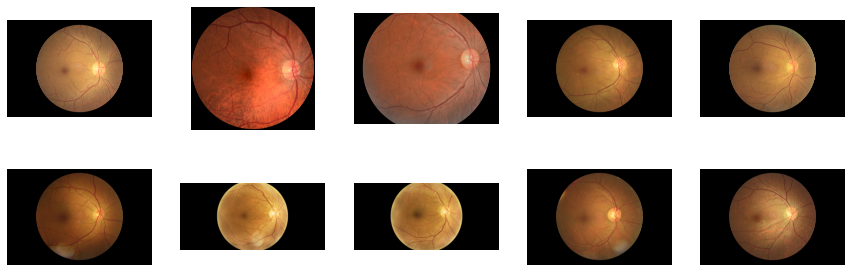

In [20]:
healthy = ocu_df.paths[ocu_df.label == 'Healthy'].reset_index()
print("Healthy participants:")
plt.figure(figsize=(15,5))
for img in range(0,10):
    plt.subplot(2, 5, img+1)
    image = mpimg.imread(healthy.paths[img])
    imgplot = plt.imshow(image)
    plt.axis(False)
plt.show()

Diabetes participants:


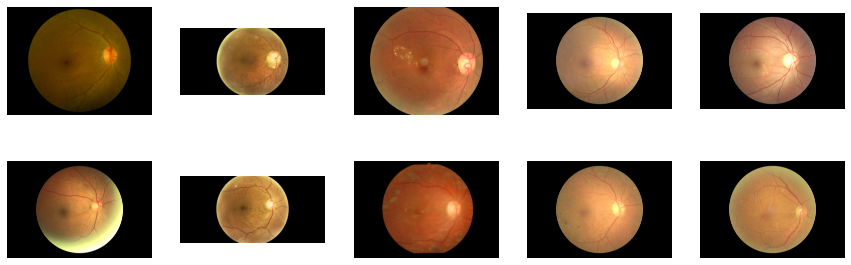

In [21]:
diabetes = ocu_df.paths[ocu_df.label == 'Diabetes'].reset_index()
print("Diabetes participants:")
plt.figure(figsize=(15,5))
for img in range(0,10):
    plt.subplot(2, 5, img+1)
    image = mpimg.imread(diabetes.paths[img])
    imgplot = plt.imshow(image)
    plt.axis(False)
plt.show()

In [23]:
x = np.array([np.array(Image.open(fname), dtype='float32') for fname in ocu_df.paths])

MemoryError: Unable to allocate 103. MiB for an array with shape (1728, 2592, 3) and data type float64

In [ ]:
x.dump('ocu_images.npy')
# x = np.load('file.npy')

### Baseline model

Fit and evaluate one or two classical (i.e. "not deep") supervised machine learning methods that are most suitable to serve as a reference to assess a baseline performance. Briefly motivate your choice(s).

### Fully-connected neural network model

Design a fully-connected neural network that is able to perform the chosen classification/regression task. Properly motivate your design choices, or determine suitable values for model hyperparameters. Explain in particular how you decided on or arrived at: the depth of the model and the width of the various layers, the employed activation and loss functions, the batch size and number of epochs, and the employed optimizer. Show the model layout summary, train it on the available data, and reliably evaluate its performance. Determine whether in your opinion the model is over- and/or underfitting, and critically comment on how well your final model does in comparison to the baseline model(s), or potentially other model configurations that you tried. Reflect on potential further ways to improve the model that you did not have the time or opportunity to explore.

### Regularized convolutional neural network model

Design a convolutional neural network that includes multiple forms of regularization and that is able to perform the required task. The number of trainable model parameters should be of the same order of magnitude (i.e. not more than a factor 10 different) as that from your previous fully-connected neural network. Again, explain your design choices that may now also include e.g. kernel size, padding, stride, and use of max-pooling, show the model layout, train it on the available data, evaluate its performance, assess any over- or underfitting, critically comment on how well your final model does in comparison to the baseline model(s) and the fully-connected neural network, or other model configurations that you tried, and reflect on potential further improvements that you did not explore.

### Submission

1. If you have not registered for the oral review yet, pick a slot and register your dataset (see the [reservation form](https://hanzenl.sharepoint.com/:x:/r/sites/DSLSforstudentscohort2021-2022/Gedeelde%20documenten/discussion%20forum%20data%20science/BFVM19DATASC3_T_DataScience3_2122_DSLS_LADR_OralExamSchedule.xlsx?d=w45fb37567f574c2f8f786dede0928ba7&csf=1&web=1&e=FmW2Lt));

2. Evaluate this notebook and check that all cells run without errors (*Kernel > Restart & Run All*);

3. Export this notebook as an `html`-file (*File > Download as > HTML (.html)*);

4. Save this notebook as an `ipynb`-file (*File > Save and Checkpoint*);

5. Compress both files into a single archive with your name and student number (e.g. `Jane_Doe_123456.zip`);

6. Submit your zip-file ***before* Saturday 25 Jun 2022** (see [BlackBoard](https://blackboard.hanze.nl/webapps/assignment/uploadAssignment?content_id=_5934849_1&course_id=_352597_1)).

<div class="alert alert-warning">Note: upload the correct definitive versions of your files; one single submission is possible and submitted work is final!</div>

In [ ]:
# DO NOT MODIFY THIS CODE CELL
from platform import uname, platform
print(f'Elapsed time equals {(process_time() - starttime) / 60.0:.1f} minutes on host {uname().node} ({platform()}).')

### Grading rubric

Four your information, assessment will comprise three parts:

1. *Coding*, refering to the python implementation of the data processing and modeling (mostly in your notebook);

2. *Design*, refering to the suitability of the chosen processing steps and models (mostly in your notebook);

3. *Theory*, refering to your shown understanding of ideas and concepts (mostly in your oral review).

All three parts need to score at least a passing grade. The final grade is the average grade if all parts pass, or the lowest grade if any part fails.

The following descriptions may serve as guides; applicability and weighting of subitems may depend on the problem and solution.

| | &#x1F534; <font color="#cc0033">*Fail* $(\lesssim 4)$</font> | &#x1F7E0; <font color="#cc9900">*Pass* $(\approx 6)$</font> | &#x1F7E2; <font color="#009900">*Good* $(\gtrsim 8)$</font> |
| :- | :- | :- | :- |
| **Coding** | code is valid but not very clear | code is suitable and understandable | code is most appropriate and easily readable |
| | code is inefficient or convoluted | code is verbose or efficiency is improvable | code is efficient and succint |
| | notebook contains occasional comments | notebook is self-explanatory | notebook is unambiguously annotated |
| | analysis pipeline is somewhat reproducible | analysis pipeline is mostly reproducible | analysis pipeline is identically reproducible |
| | data organisation is untidy | data organisation is appropriate | data is excellently organised |
| | some models are set up incorrectly | adequate models are instantiated | properly tailored models are created |
| | models are badly compiled, trained or evaluated | models are suboptimally compiled, trained or evaluated | models are optimally compiled, trained and evaluated |
| | results are presented unclearly or incompletely | results are intelligible but unappealing | results are presented clearly and attractively |
| **Design** | chosen problem is trivial | chosen problem is straightforward | chosen problem is challenging |
| | data exploration is incomplete or inapplicable | data exploration is marginal or partly uninformative | data exploration is comprehensive and relevant |
| | some preprocessing is performed | data preparation is valid but arguably incomplete | data preparation is correct and thorough |
| | model hyperparameters are doubtful | model hyperparameters are defensible | model hyperparameters are optimal |
| | model design is poorly motivated | model design is reasonably motivated but debatable | model design is convincingly argued |
| | substantial under-/overfitting is apparent | minor under-/overfitting may occur | no evidence for under-/overfitting |
| | models are evaluated poorly or incorrectly | models are evaluated suitably but incompletely | model evaluation is reliable and thorough |
| | approach is generic and uniform | approach is specific and customized | approach is distinctive and creative |
| **Theory** | code function is misapprehended | code function is correctly verbalized | code function is well explained |
| | occasional use of technical wording | regular use of correct terminology | routine use of appropriate jargon |
| | techniques are vaguely understood | techniques are generally understood | techniques are proficiently understood |
| | knowledge limited to core ideas only | knowledge encompasses covered material fully | knowledge extends beyond material covered in class |
| | model design process remains unclear | model development is articulated | model creation is exhaustively explained |
| | model performance is uncritically assessed | model performance is observantly appraised | models are critically scrutinized |
| | passive conversation with deflecting answers | interactive but uninspiring discussion | engaging on-topic dialogue with original input |
| | ability to uncertainly speculate | ability to plausibly argue | ability to intelligently reason |

<div class="alert alert-success">Success!</div>

***

<small>&copy; 2022, Dave R.M. Langers, [d.r.m.langers@pl.hanze.nl](mailto:d.r.m.langers@pl.hanze.nl)</small>